In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xg
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score,recall_score

In [11]:

with open('C:\\Users\\Ankan Dutta\\Downloads\\drug_consumption (1).data', 'r') as f:
    data = f.readlines()
data = [line.strip().split(',') for line in data]
labels = [row[-1] for row in data]
data = [row[:-1] for row in data]
df = pd.DataFrame(data, columns=['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'])
df['label'] = labels
df.to_csv('C:\\Users\\Ankan Dutta\\drug consumption2.csv', index=True)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Ankan Dutta\\drug consumption2.csv'

In [12]:
data=pd.read_csv('C:\\Users\\Ankan Dutta\\drug consumption2.csv')
data

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [13]:
data.shape

(1885, 32)

In [16]:

data.head()

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [17]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Gender        0
Education     0
Country       0
Ethnicity     0
Nscore        0
Escore        0
Oscore        0
AScore        0
Cscore        0
Impulsive     0
SS            0
Alcohol       0
Amphet        0
Amyl          0
Benzos        0
Caff          0
Cannabis      0
Choc          0
Coke          0
Crack         0
Ecstasy       0
Heroin        0
Ketamine      0
Legalh        0
LSD           0
Meth          0
Mushrooms     0
Nicotine      0
Semer         0
VSA           0
dtype: int64

In [18]:
data.query("Semer != 'CL0'")

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [19]:
data = data.drop(data[data['Semer'] != 'CL0'].index)
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)
data

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1873,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1874,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0
1875,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0


In [20]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

In [21]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL4':
        return 5
    elif x == 'CL5':
        return 6
    else:
        return 7

In [22]:
for column in drugs:
    data[column] = data[column].apply(drug_encoder)

In [23]:
data.head()

,Unnamed: 0,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,2,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0,4,0,2,0,2,3,0,4,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,1,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,2,0,0,0,0,2,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,1,0,0,1,0,0,2,2,0


<Axes: >

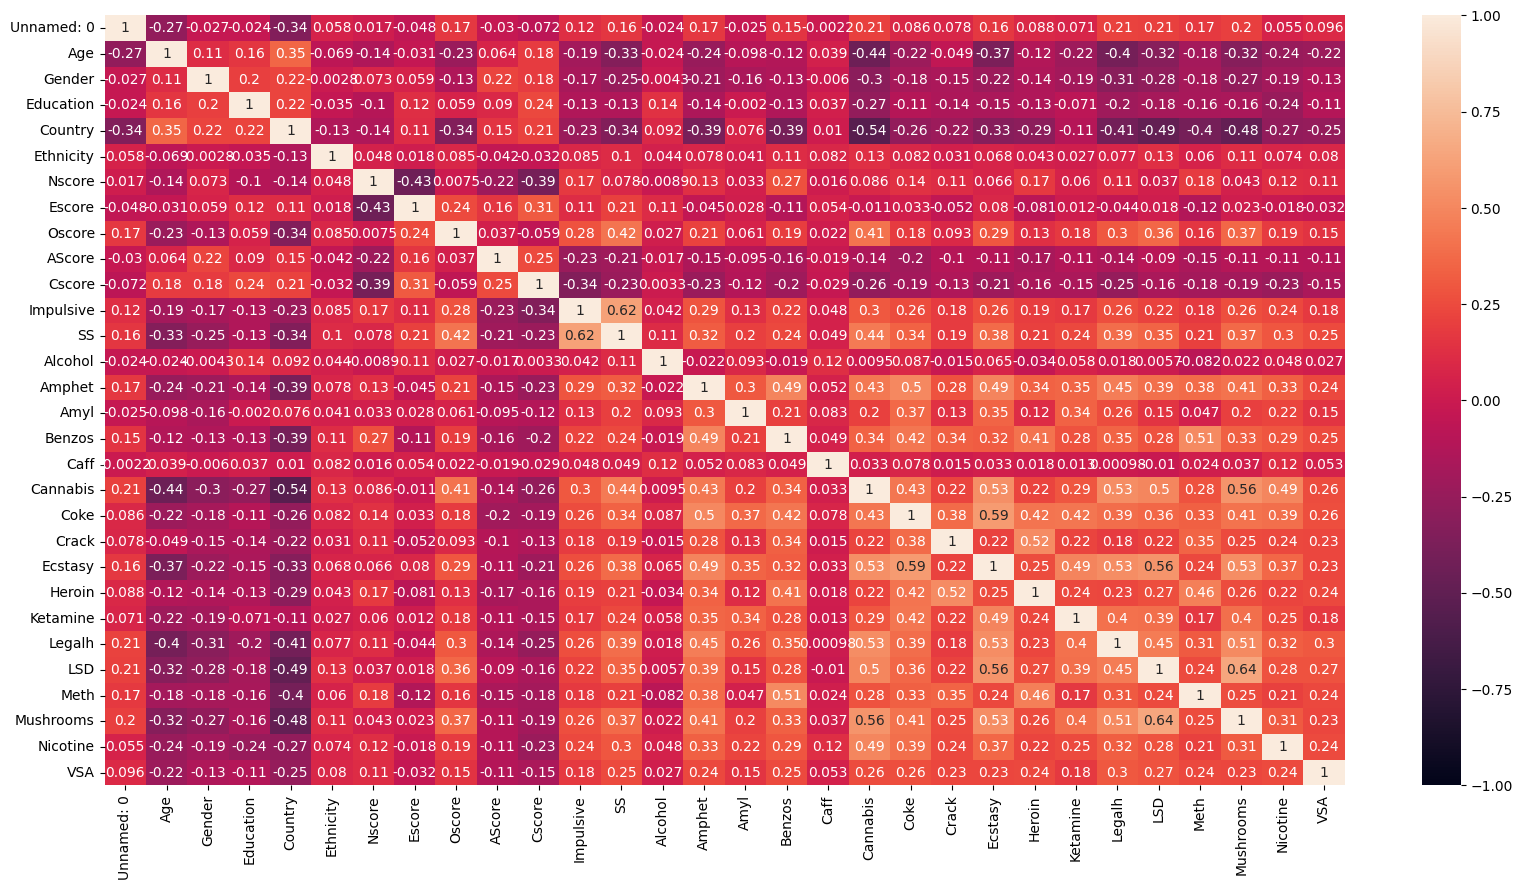

In [24]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [25]:
low_corr = ['Age', 'Gender', 'Education', 'Alcohol','AScore','Caff']
for column in low_corr:
    data = data.drop(column, axis=1)
data.head()

,Unnamed: 0,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,...,0,0,0,0,0,0,0,0,2,0
1,2,0.96082,-0.31685,-0.67825,1.93886,1.43533,-0.14277,-0.71126,-0.21575,2,...,0,4,0,2,0,2,3,0,4,0
2,3,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.01450,-1.37983,0.40148,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.58489,-1.37983,-1.18084,0,...,0,0,0,2,0,0,0,0,2,0
4,5,0.96082,-0.31685,0.73545,-1.63340,-0.45174,1.30612,-0.21712,-0.21575,1,...,0,1,0,0,1,0,0,2,2,0


In [26]:
print(f'In the new dataframe there are {data.shape[0]} rows and {data.shape[1]} columns')

In the new dataframe there are 1877 rows and 24 columns


In [27]:
cocaine_df = data.copy()
cocaine_df['coke_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

In [28]:
meth_df = data.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [29]:
heroin_df = data.copy()
heroin_df['Heroin_User'] = heroin_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
heroin_df = heroin_df.drop(['Heroin'], axis=1)

In [30]:
nic_df = data.copy()
nic_df['Nicotine_User'] = nic_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
nic_df = nic_df.drop(['Nicotine'], axis=1)

In [31]:
cocaine_df.head(1)

,Unnamed: 0,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Cocaine_User
0,1,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,...,0,0,0,0,0,0,0,2,0,0


In [32]:
meth_df.head(1)

,Unnamed: 0,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Mushrooms,Nicotine,VSA,Meth_User
0,1,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,...,0,0,0,0,0,0,0,2,0,0


In [33]:
heroin_df.head(1)

,Unnamed: 0,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,...,Crack,Ecstasy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Heroin_User
0,1,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,...,0,0,0,0,0,0,0,2,0,0


In [34]:
nic_df.head(1)

,Unnamed: 0,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,Nicotine_User
0,1,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.00665,-0.21712,-1.18084,2,...,0,0,0,0,0,0,0,0,0,1


In [35]:
def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [36]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

In [37]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

In [38]:
X_train.head()

,Unnamed: 0,Country,Ethnicity,Nscore,Escore,Oscore,Cscore,Impulsive,SS,Amphet,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
1006,0.113971,-1.321270,-0.041143,-0.578137,1.455903,1.864458,-0.768005,0.207292,1.984586,-0.719954,...,-0.342097,1.455704,-0.351702,-0.457478,0.811611,-0.682153,-0.487621,-0.786702,0.146012,-0.437770
58,-1.632054,0.862545,-0.041143,0.225143,0.642748,-0.035252,-0.391968,1.953304,1.268254,-0.218492,...,2.068641,0.899013,0.564799,1.826360,0.811611,-0.053986,-0.487621,0.520983,1.194642,0.547376
1229,0.522537,-1.321270,-0.041143,0.043966,-1.080192,-0.035252,0.599515,-1.437432,-1.581822,0.282970,...,-0.342097,0.899013,-0.351702,-0.457478,-0.729799,1.202347,1.123352,1.174826,-0.203532,-0.437770
1726,1.438604,0.862545,-0.041143,-1.050581,0.809519,-0.597895,1.477228,0.207292,0.091722,-0.719954,...,-0.342097,-0.771059,-0.351702,-0.457478,-0.729799,-0.682153,-0.487621,-0.786702,-0.553075,-0.437770
1173,0.419937,-1.321270,-0.041143,-0.465341,0.328192,0.125063,0.137570,1.357316,0.422238,-0.719954,...,-0.342097,-0.214369,-0.351702,-0.457478,-0.729799,-0.053986,-0.487621,-0.132859,-1.252162,-0.437770


In [39]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1501, 24) (1501,)
Test set: (376, 24) (376,)


In [69]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier(),
            'DecisionTreeClassifier':DecisionTreeClassifier(),
            'KNeighborsClassifier':KNeighborsClassifier(),
            'MLPClassifier':MLPClassifier()}

In [70]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.
DecisionTreeClassifier trained.
KNeighborsClassifier trained.
MLPClassifier trained.


In [72]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))
print('---------------------------------------------')
print('                  Precision Score')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = precision_score(y_test, yhat, pos_label=1)
    print(name + ' Precission Score: {:.5}'.format(f1))
print('---------------------------------------------')
print('                  Recall Score')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = recall_score(y_test, yhat, pos_label=1)
    print(name + ' Recall Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 100.00%
        Ridge Classifier Accuracy: 99.73%
 Support Vector Machines Accuracy: 99.20%
Random Forest Classifier Accuracy: 100.00%
DecisionTreeClassifier Accuracy: 100.00%
KNeighborsClassifier Accuracy: 90.96%
MLPClassifier Accuracy: 99.73%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 1.0
        Ridge Classifier F1-Score: 0.99608
 Support Vector Machines F1-Score: 0.98833
Random Forest Classifier F1-Score: 1.0
DecisionTreeClassifier F1-Score: 1.0
KNeighborsClassifier F1-Score: 0.864
MLPClassifier F1-Score: 0.99611
---------------------------------------------
                  Precision Score
     Logisitc Regression Precission Score: 1.0
        Ridge Classifier Precission Score: 1.0
 Support Vector Machines Precission Score: 0.9845
Random Forest Classifier Precission Score: 1.0
DecisionTreeClassifier Precission Score: 1.0
KNeighborsClassifier Precission S

In [80]:
print('---------------------------------------------')
print('                  Confusion Matrix')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = confusion_matrix(y_test, yhat)
    print(name , ' Confusion Matrix:- \n',f1)

---------------------------------------------
                  Confusion Matrix
     Logisitc Regression  Confusion Matrix:- 
 [[248   0]
 [  0 128]]
        Ridge Classifier  Confusion Matrix:- 
 [[248   0]
 [  1 127]]
 Support Vector Machines  Confusion Matrix:- 
 [[246   2]
 [  1 127]]
Random Forest Classifier  Confusion Matrix:- 
 [[248   0]
 [  0 128]]
DecisionTreeClassifier  Confusion Matrix:- 
 [[248   0]
 [  0 128]]
KNeighborsClassifier  Confusion Matrix:- 
 [[234  14]
 [ 20 108]]
MLPClassifier  Confusion Matrix:- 
 [[247   1]
 [  0 128]]
